In [2]:
# import modules
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
# Load dataset
ames = pd.read_csv("/Users/mymacpro/Documents/PROJECTS/house-predict/data/train.csv")
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check data type for first 20 variable
print(ames.dtypes[0:21])

# extract all non-numeric column names
ames.select_dtypes(exclude=[np.number]).columns

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
dtype: object


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## MSZoning
### Categories in dataset:  
       C	Commercial
       FV	Floating Village Residential  
       RH	Residential High Density  
       RL	Residential Low Density  
       RM	Residential Medium Density  
       
### Categories not in dataset (possiblely included in C(all)):  
       RP	Residential Low Density Park
       A	Agriculture
       I	Industrial

### comment: 
FV category 4.5% less than 5%  
Commerical(all) has very little observation but low price. Group into residential for now. 

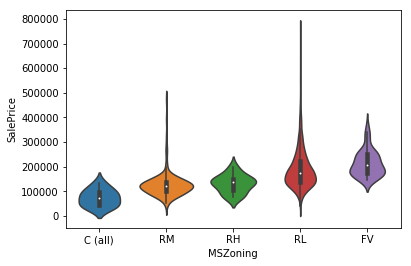

In [14]:
sns.violinplot(x="MSZoning", y="SalePrice",order=["C (all)","RM", "RH", "RL","FV"],data=ames)

In [6]:
# check completeness
len(ames.MSZoning)

1460

In [72]:
ames.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


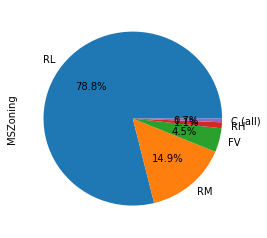

In [18]:
plt.figure(figsize=(4, 4))
print(ames.MSZoning.value_counts()/len(ames.MSZoning))
ames.MSZoning.value_counts().plot.pie(autopct='%1.1f%%')

In [10]:
# ANOVA test
stats.f_oneway(ames.SalePrice[ames.MSZoning == "RL"],
              ames.SalePrice[ames.MSZoning == "RM"],
              ames.SalePrice[ames.MSZoning == "FV"],
              ames.SalePrice[ames.MSZoning == "RH"],
              ames.SalePrice[ames.MSZoning == "C (all)"])

F_onewayResult(statistic=43.84028167245718, pvalue=8.817633866272648e-35)

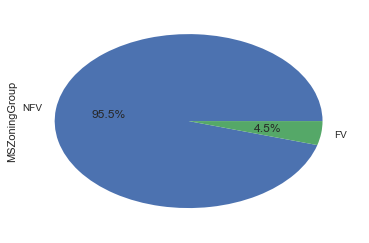

In [80]:
# group into residential/nonresidential zone
#zoningGroup = {'RL':'FV','RM':'FV','RH':'FV','C (all)':'FV','FV':'NFV'}
#ames['MSZoningGroup']=ames.MSZoning.map(zoningGroup)
ames['MSZoningGroup'] = np.where(ames['MSZoning']=='FV', 'FV', 'NFV')
ames.MSZoningGroup.value_counts().plot.pie(autopct='%1.1f%%')

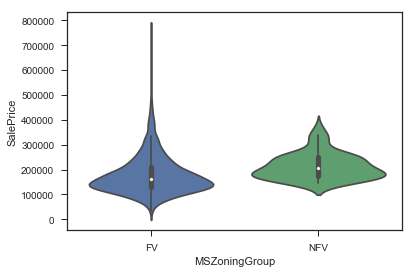

In [74]:
sns.violinplot(x="MSZoningGroup", y="SalePrice",data=ames)

In [129]:
stats.ttest_ind(ames.SalePrice[ames.MSZoningGroup == 'FV'], 
                ames.SalePrice[ames.MSZoningGroup == 'NFV'], equal_var = False)

Ttest_indResult(statistic=5.0627902812462535, pvalue=2.6553776200395075e-06)

In [122]:
Dummy_MSZoning = pd.get_dummies(ames['MSZoningGroup'])
len(Dummy_MSZoning)

1460

## Neighborhood  
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

### Comment:
group into 4 neighborhoods according to price percentile and map layout

In [118]:
# check completeness
len(ames.Neighborhood)

1460

In [90]:
# rank by median sales price
ames.groupby('Neighborhood')['SalePrice'].agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

,count,sum,min,max,mean,std
Neighborhood,,,,,,
Blmngtn,17,3312805,159895,264561,194870.882353,30393.229219
Blueste,2,275000,124000,151000,137500.000000,19091.883092
BrDale,16,1671900,83000,125000,104493.750000,14330.176493
BrkSide,58,7240375,39300,223500,124834.051724,40348.689270
ClearCr,28,5951832,130000,328000,212565.428571,50231.538993
CollgCr,150,29694866,110000,424870,197965.773333,51403.666438
Crawfor,51,10741861,90350,392500,210624.725490,68866.395472
Edwards,100,12821970,58500,320000,128219.700000,43208.616459
Gilbert,79,15235506,141000,377500,192854.506329,35986.779085


In [67]:
ames.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

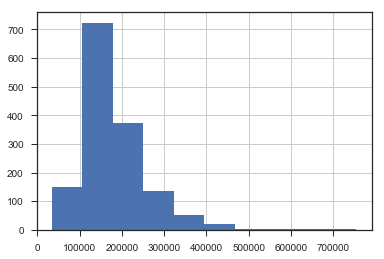

In [68]:
ames.SalePrice.hist()

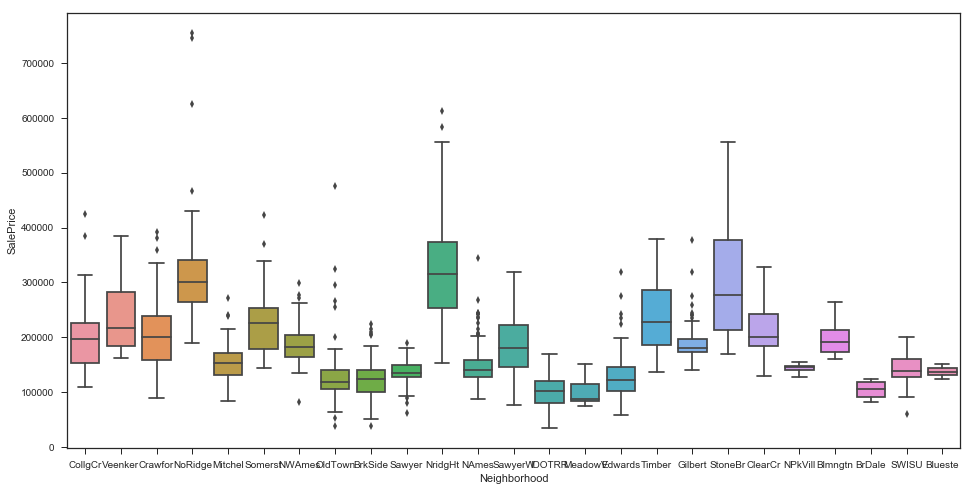

In [50]:
sns.set(style="ticks")
plt.figure(figsize=(16, 8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=ames)

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('SalePrice ~ Neighborhood',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                    sum_sq      df          F         PR(>F)
Neighborhood  5.023606e+12    24.0  71.784865  1.558600e-225
Residual      4.184305e+12  1435.0        NaN            NaN


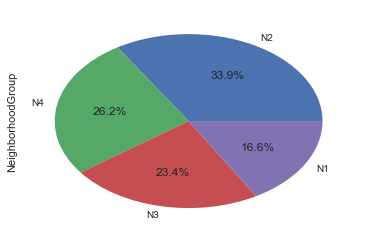

In [98]:
# Group into 4 levels according to sales price percentile and general location in the map
N1 = ['NridgHt','NoRidge','Somerst','Timber']
N2 = ['StoneBr','Veenker','Crawfor','ClearCr','CollgCr','Blmngtn','NWAmes','Gilbert','SawyerW','Blueste']
N3 = ['Mitchel','NPkVill','NAmes','SWISU','BrDale','MeadowV']
N4 = ['BrkSide','Edwards','OldTown','IDOTRR','Sawyer']
ames['NeighborhoodGroup']=['N1' if n in N1 else 'N2' if n in N2 else 'N3' if n in N3 else 'N4' for n in ames.Neighborhood]
ames.NeighborhoodGroup.value_counts().plot.pie(autopct='%1.1f%%')

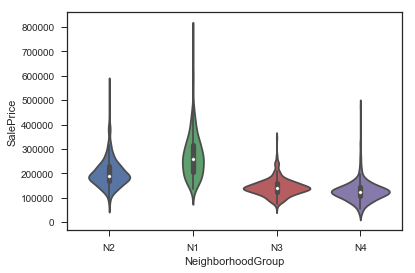

In [112]:
sns.violinplot(x="NeighborhoodGroup", y="SalePrice", data=ames)

In [101]:
mod = ols('SalePrice ~ NeighborhoodGroup',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
NeighborhoodGroup,4.028607e+12,3.0,377.505846,2.426026e-181
Residual,5.179304e+12,1456.0,NaN,NaN


In [102]:
Dummy_Neighborhood = pd.get_dummies(ames['NeighborhoodGroup'])
len(Dummy_MSZoning)

1460

## MSSubClass  
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

### Comment:
group into one story and other  
seems mostly the same with BldgType variable.  BldgType has been grouped into 3 categories  
and number of stories information has been counted for in variable HouseStyle.  
consider drop this variable

In [213]:
ames.groupby(['MSSubClass','BldgType']).count()[['Id']]

Id
MSSubClass BldgType     
20         1Fam      535
           2fmCon      1
30         1Fam       69
40         1Fam        4
45         1Fam       12
50         1Fam      144
60         1Fam      299
70         1Fam       60
75         1Fam       16
80         1Fam       58
85         1Fam       20
90         Duplex     52
120        1Fam        3
           Twnhs       5
           TwnhsE     79
160        Twnhs      33
           TwnhsE     30
180        Twnhs       5
           TwnhsE      5
190        2fmCon     30

In [109]:
ames.groupby('MSSubClass')['SalePrice'].agg(['count', 'sum', 'min', 'max', 'mean', 'median','std']).sort_values(by='median')

,count,sum,min,max,mean,median,std
MSSubClass,,,,,,,
180,10,1023000,75500,148000,102300.000000,88500,29474.282575
30,69,6612251,34900,163500,95829.724638,99900,24857.110083
45,12,1303100,76000,139400,108591.666667,107500,20231.723889
190,30,3888400,55000,228950,129613.333333,128250,35439.097670
50,144,20635628,37900,410000,143302.972222,132000,54851.983707
90,52,6944136,82000,206300,133541.076923,135980,27833.249197
85,20,2956200,123000,198500,147810.000000,140750,19629.942220
40,4,624500,79500,260000,156125.000000,142500,75747.799748
160,63,8734785,75000,239000,138647.380952,146000,34587.542266


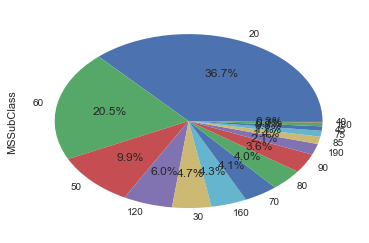

In [104]:
ames.MSSubClass.value_counts().plot.pie(autopct='%1.1f%%')

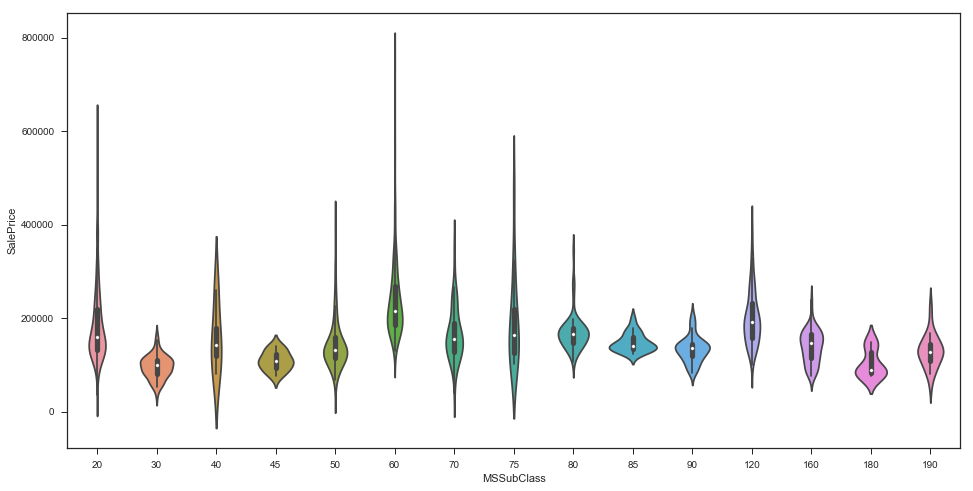

In [63]:
sns.set(style="ticks")
plt.figure(figsize=(16, 8))
sns.violinplot(x="MSSubClass", y="SalePrice", data=ames)

In [44]:
mod = ols('SalePrice ~ MSSubClass',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df          F    PR(>F)
MSSubClass  6.541130e+10     1.0  10.431466  0.001266
Residual    9.142500e+12  1458.0        NaN       NaN


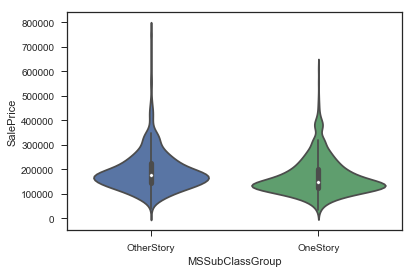

In [114]:
# group into onestory v.s. other
onestory = [20,30,40,45,50,120,150] #150 not in training set
ames['MSSubClassGroup'] = ['OneStory' if x in onestory else 'OtherStory' for x in ames.MSSubClass]
sns.violinplot(x="MSSubClassGroup", y="SalePrice", data=ames)

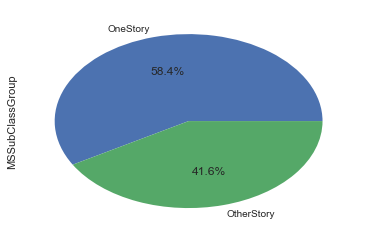

In [116]:
ames.MSSubClassGroup.value_counts().plot.pie(autopct='%1.1f%%')

In [130]:
stats.ttest_ind(ames.SalePrice[ames.MSSubClassGroup == 'OneStory'], 
                ames.SalePrice[ames.MSSubClassGroup == 'OtherStory'], equal_var = False)

Ttest_indResult(statistic=-5.462126477935139, pvalue=5.689157480277294e-08)

In [140]:
Dummy_MSSubClass = pd.get_dummies(ames['MSSubClassGroup'])
len(Dummy_MSSubClass)

1460

## LotFrontage

### Comment:
size normally distributed. impute missing value with mean

In [72]:
# check for NA value, 17.74% NA
print(ames.LotFrontage.isnull().sum())
print(ames.LotFrontage.isnull().sum()/len(ames.LotFrontage))

259
0.1773972602739726


In [141]:
# mean and median value almost the same. 
ames.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

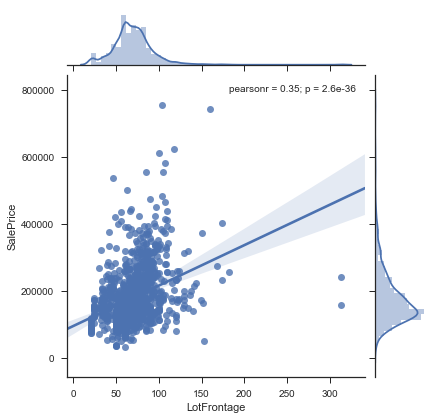

In [47]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=ames, kind="reg") 

In [120]:
# impute missing value with mean
ames.LotFrontage.fillna(ames.LotFrontage.mean(),inplace=True)
ames.LotFrontage.isnull().sum()

0

In [121]:
#stats.linregress(ames.LotFrontage, ames.SalePrice)
mod = ols('SalePrice ~ LotFrontage',data=ames)
print(mod.fit().params)
mod.fit().pvalues

Intercept      96299.756961
LotFrontage     1208.015549
dtype: float64


Intercept      6.574080e-46
LotFrontage    1.346651e-39
dtype: float64

## LotArea

### Comment:
no missing value.  
some outliers. keep as is for now

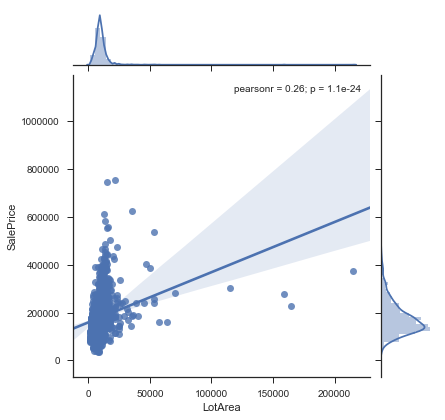

In [49]:
sns.jointplot(x='LotArea', y='SalePrice', data=ames, kind="reg") 

In [144]:
print(stats.linregress(ames.LotArea, ames.SalePrice))
ols('SalePrice ~ LotArea',data=ames).fit().params

LinregressResult(slope=2.0999719517076745, intercept=158836.1518968766, rvalue=0.2638433538714056, pvalue=1.1231391549186287e-24, stderr=0.2010575176984753)


Intercept    158836.151897
LotArea           2.099972
dtype: float64

## Street
       Grvl	Gravel	
       Pave	Paved

### Comment:
less than 1% for Grvl  
not statisticly significant, drop

In [132]:
ames.Street.value_counts()/1460

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

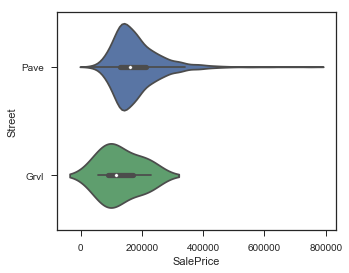

In [65]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="SalePrice", y="Street", data=ames)

In [60]:
stats.ttest_ind(ames.SalePrice[ames.Street == 'Pave'], 
                ames.SalePrice[ames.Street == 'Grvl'], equal_var = False)

Ttest_indResult(statistic=1.9007878559110067, pvalue=0.11504797250476277)

## Alley
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

### Comment:
group into Alley v.s. noAlley 

In [125]:
# fill NA as "NoAccess"
ames.Alley.fillna("NoAccess",inplace=True)

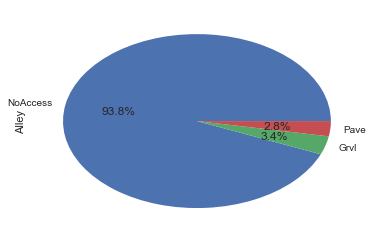

In [126]:
ames.Alley.value_counts().plot.pie(autopct='%1.1f%%')

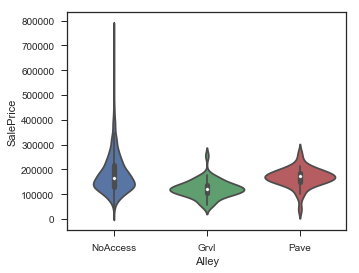

In [80]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="Alley", y="SalePrice", data=ames)

In [84]:
mod = ols('SalePrice ~ Alley',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
Alley     1.879109e+11     2.0  15.176614  2.996380e-07
Residual  9.020000e+12  1457.0        NaN           NaN


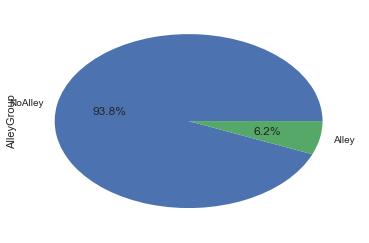

In [135]:
# group into Alley vs noAlley
ames['AlleyGroup']=['NoAlley' if x=='NoAccess' else 'Alley' for x in ames.Alley]
ames.AlleyGroup.value_counts().plot.pie(autopct='%1.1f%%')

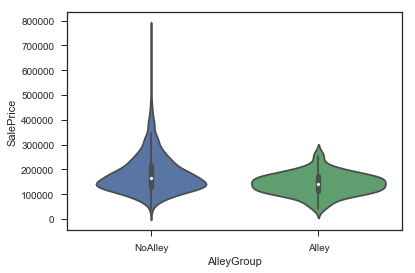

In [136]:
sns.violinplot(x="AlleyGroup", y="SalePrice", data=ames)

In [134]:
stats.ttest_ind(ames.SalePrice[ames.AlleyGroup == 'NoAlley'], 
                ames.SalePrice[ames.AlleyGroup == 'Alley'], equal_var = False)

Ttest_indResult(statistic=8.129938652163084, pvalue=2.292523044749409e-13)

In [141]:
Dummy_Alley = pd.get_dummies(ames['AlleyGroup'])
len(Dummy_Alley)

1460

## LotShape
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

### Comment:
group into regular v.s. irregular

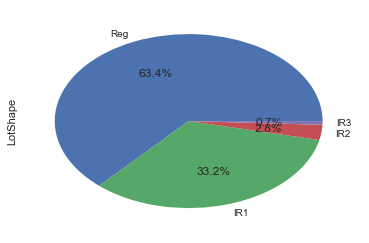

In [139]:
ames.LotShape.value_counts().plot.pie(autopct='%1.1f%%')

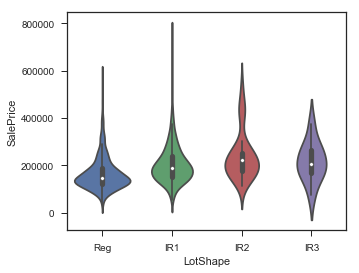

In [83]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LotShape", y="SalePrice", data=ames)

In [87]:
mod = ols('SalePrice ~ LotShape',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LotShape,7.032607e+11,3.0,40.132852,6.447524e-25
Residual,8.504651e+12,1456.0,NaN,NaN


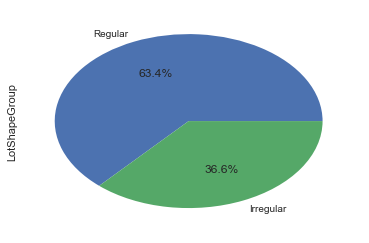

In [143]:
# group into regular vs irregular
ames['LotShapeGroup']=['Regular' if x =='Reg' else 'Irregular' for x in ames.LotShape]
ames.LotShapeGroup.value_counts().plot.pie(autopct='%1.1f%%')

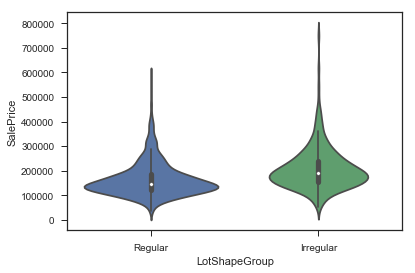

In [144]:
sns.violinplot(x="LotShapeGroup", y="SalePrice", data=ames)

In [145]:
stats.ttest_ind(ames.SalePrice[ames.LotShapeGroup == 'Regular'], 
                ames.SalePrice[ames.LotShapeGroup == 'Irregular'], equal_var = False)

Ttest_indResult(statistic=-9.998683796044762, pvalue=2.0075746340919894e-22)

In [146]:
Dummy_LotShape = pd.get_dummies(ames['LotShapeGroup'])
len(Dummy_LotShape)

1460

## LandContour
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

### Comment:
difference not statisticly significant after group into flat vs unflat  
consider drop

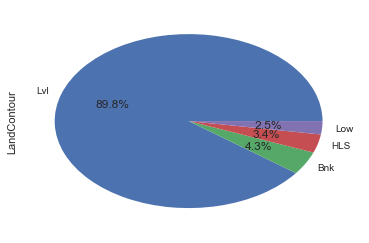

In [147]:
ames.LandContour.value_counts().plot.pie(autopct='%1.1f%%')

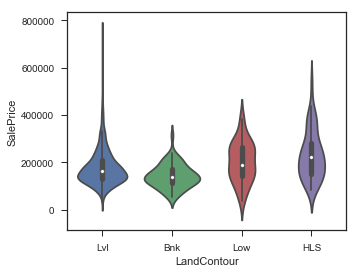

In [85]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LandContour", y="SalePrice", data=ames)

In [89]:
mod = ols('SalePrice ~ LandContour',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LandContour,2.375097e+11,3.0,12.850188,2.742217e-08
Residual,8.970402e+12,1456.0,NaN,NaN


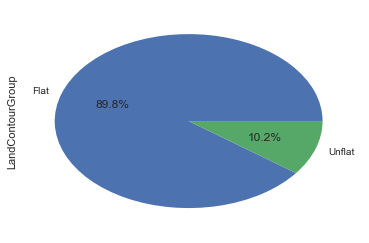

In [150]:
# group into flat v.s. unflat
ames['LandContourGroup']=['Flat' if x=='Lvl' else 'Unflat' for x in ames.LandContour]
ames.LandContourGroup.value_counts().plot.pie(autopct='%1.1f%%')

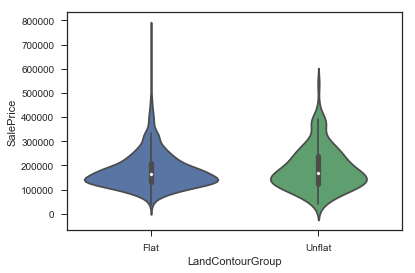

In [153]:
sns.violinplot(x="LandContourGroup", y="SalePrice", data=ames)

In [152]:
stats.ttest_ind(ames.SalePrice[ames.LandContourGroup == 'Flat'], 
                ames.SalePrice[ames.LandContourGroup == 'Unflat'], equal_var = False)

Ttest_indResult(statistic=-0.9638562444973346, pvalue=0.3364400709915697)

## Utilities
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

### Comment:
most of the house does have all utilities, only one observation for NoSeWa  
Drop variable

In [155]:
ames.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

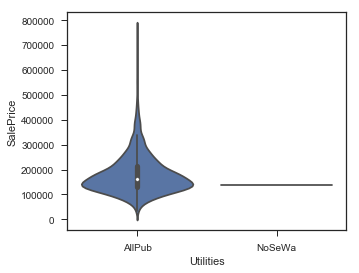

In [90]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="Utilities", y="SalePrice", data=ames)

In [96]:
mod = ols('SalePrice ~ Utilities',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Utilities,1.886693e+09,1.0,0.298804,0.584717
Residual,9.206025e+12,1458.0,NaN,NaN


## LotConfig
       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

### Comment:
Group into inside v.s. not inside  
pvalue=0.0035113089217790744

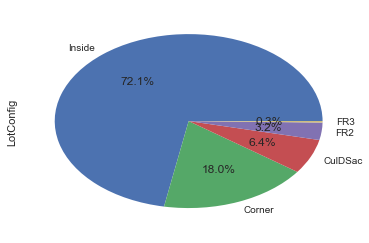

In [156]:
ames.LotConfig.value_counts().plot.pie(autopct='%1.1f%%')

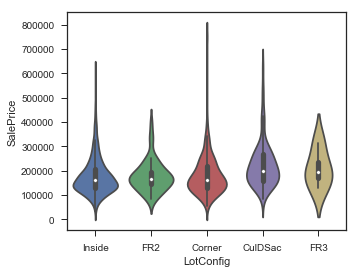

In [98]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LotConfig", y="SalePrice", data=ames)

In [100]:
mod = ols('SalePrice ~ LotConfig',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LotConfig,1.935444e+11,4.0,7.809954,0.000003
Residual,9.014367e+12,1455.0,NaN,NaN


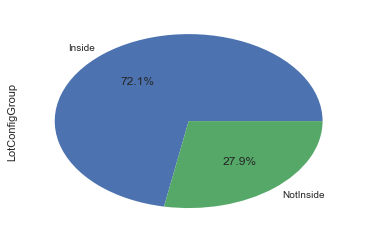

In [157]:
# Group into inside v.s. other
ames['LotConfigGroup'] = ['Inside' if x=='Inside' else 'NotInside' for x in ames.LotConfig]
ames.LotConfigGroup.value_counts().plot.pie(autopct='%1.1f%%')

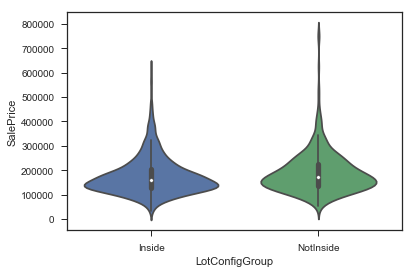

In [159]:
sns.violinplot(x="LotConfigGroup", y="SalePrice", data=ames)

In [160]:
stats.ttest_ind(ames.SalePrice[ames.LotConfigGroup == 'Inside'], 
                ames.SalePrice[ames.LotConfigGroup == 'NotInside'], equal_var = False)

Ttest_indResult(statistic=-2.9294226365467457, pvalue=0.0035113089217790744)

In [161]:
Dummy_LotConfig = pd.get_dummies(ames['LotConfigGroup'])
len(Dummy_LotConfig)

1460

## LandSlope
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

### Comment:
difference not statisticly significant, consider drop

In [101]:
ames.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

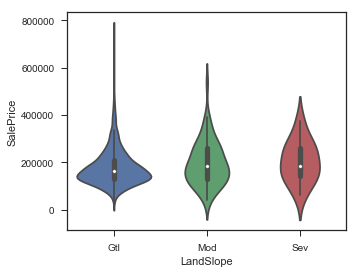

In [102]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="LandSlope", y="SalePrice", data=ames)

In [104]:
mod = ols('SalePrice ~ LandSlope',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LandSlope,2.469217e+10,2.0,1.958817,0.141396
Residual,9.183219e+12,1457.0,NaN,NaN


## Condition1
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad


### Comment:
Group into Norm v.s. UnNorm  
pvalue=2.912163202254057e-07

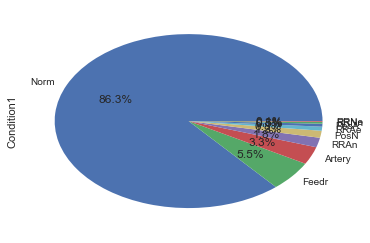

In [162]:
ames.Condition1.value_counts().plot.pie(autopct='%1.1f%%')

In [163]:
ames.groupby('Condition1')['SalePrice'].agg(['count', 'sum', 'min', 'max', 'mean', 'median','std']).sort_values(by='median')

,count,sum,min,max,mean,median,std
Condition1,,,,,,,
Artery,48,6484400,66500,475000,135091.666667,119550,66226.660548
Feedr,81,11540514,40000,244600,142475.481481,140000,42157.290117
RRAe,11,1522400,87000,171000,138400.000000,142500,24030.813553
Norm,1260,232464320,34900,755000,184495.492063,166500,81256.980125
RRAn,26,4794312,79500,423000,184396.615385,171495,66177.922070
RRNe,2,381500,187000,194500,190750.000000,190750,5303.300859
PosN,19,4088500,109500,385000,215184.210526,200000,65256.536609
PosA,8,1807000,180000,335000,225875.000000,212500,52348.932313
RRNn,5,1062000,110000,320000,212400.000000,214000,93823.238060


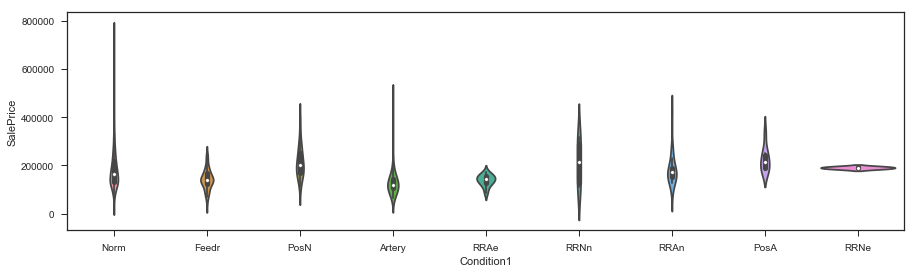

In [114]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="Condition1", y="SalePrice", data=ames)

In [115]:
mod = ols('SalePrice ~ Condition1',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Condition1,3.004600e+11,8.0,6.118017,8.904549e-08
Residual,8.907451e+12,1451.0,NaN,NaN


In [171]:
# All condition1 norm have condition 2 as norm, hence group into Norm v.s. UnNor
count = ames["Condition1"]+ames["Condition2"]
count.value_counts()

NormNorm        1260
FeedrNorm         76
ArteryNorm        45
RRAnNorm          22
PosNNorm          17
RRAeNorm          11
PosANorm           8
RRAnFeedr          4
RRNnNorm           4
RRNeNorm           2
FeedrRRNn          2
ArteryArtery       2
PosNPosN           2
ArteryPosA         1
FeedrRRAn          1
FeedrFeedr         1
FeedrRRAe          1
RRNnFeedr          1
dtype: int64

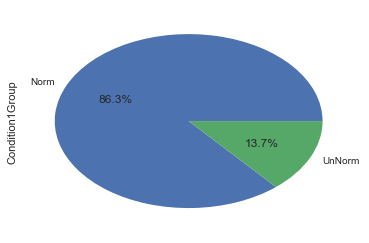

In [173]:
# group into Norm v.s. UnNorm
ames['Condition1Group'] = [x if x =='Norm' else 'UnNorm' for x in ames.Condition1]
ames.Condition1Group.value_counts().plot.pie(autopct='%1.1f%%')

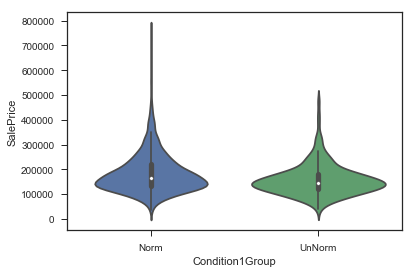

In [174]:
sns.violinplot(x="Condition1Group", y="SalePrice", data=ames)

In [175]:
stats.ttest_ind(ames.SalePrice[ames.Condition1Group == 'Norm'], 
                ames.SalePrice[ames.Condition1Group == 'UnNorm'], equal_var = False)

Ttest_indResult(statistic=5.241789629173197, pvalue=2.912163202254057e-07)

In [178]:
Dummy_Condition1 = pd.get_dummies(ames['Condition1Group'])
len(Dummy_Condition1)

1460

## Condition2


### Comment:  
All Condition1 Norm have condtition2 as Norm  
Majority of condition2 are Norm  
No additioal information value. Drop

In [184]:
ames.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

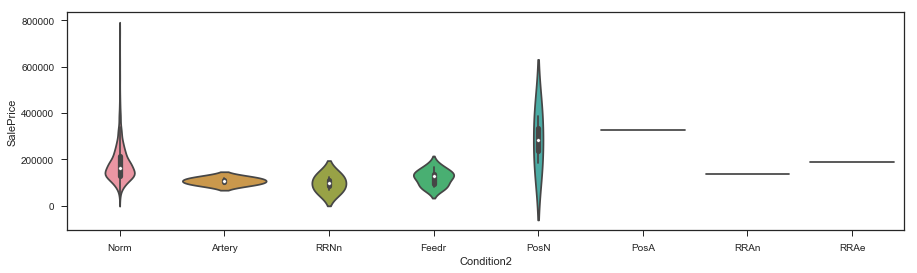

In [119]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="Condition2", y="SalePrice", data=ames)

In [121]:
mod = ols('SalePrice ~ Condition2',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Condition2,9.115059e+10,7.0,2.073899,0.043426
Residual,9.116761e+12,1452.0,NaN,NaN


## BldgType
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

### Comment:
group into onefamily, Townhouse, Duplex/2FamCon  
pvalue=1.762889e-09

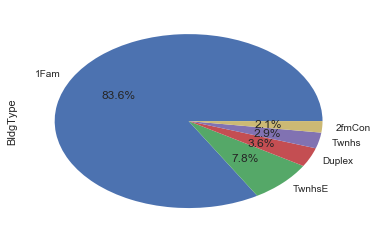

In [185]:
ames.BldgType.value_counts().plot.pie(autopct='%1.1f%%')

In [207]:
ames.groupby('BldgType')['SalePrice'].agg(['count', 'sum', 'min', 'max', 'mean', 'median','std']).sort_values(by='median')

,count,sum,min,max,mean,median,std
BldgType,,,,,,,
2fmCon,31,3981400,55000,228950,128432.258065,127500,35458.545158
Duplex,52,6944136,82000,206300,133541.076923,135980,27833.249197
Twnhs,43,5844200,75000,230000,135911.627907,137500,41013.222080
1Fam,1220,226631845,34900,755000,185763.807377,167900,82648.502922
TwnhsE,114,20743365,75500,392500,181959.342105,172200,60626.108918


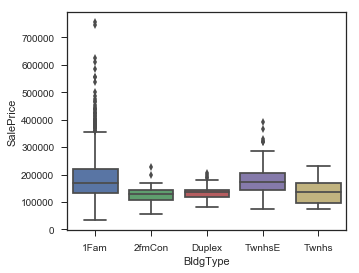

In [182]:
plt.figure(figsize=(5, 4))
sns.boxplot(x="BldgType", y="SalePrice", data=ames)

In [124]:
mod = ols('SalePrice ~ BldgType',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
BldgType,3.179863e+11,4.0,13.011077,2.056736e-10
Residual,8.889925e+12,1455.0,NaN,NaN


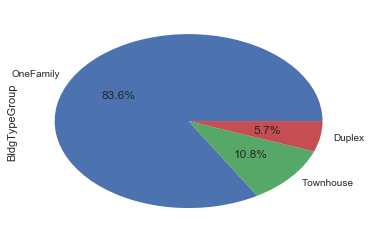

In [210]:
# group into OneFamily, Duplex and Townhouse
ames['BldgTypeGroup'] = ['OneFamily' if x=='1Fam' else 'Duplex' if x in ['2fmCon','Duplex'] else 'Townhouse' for x in ames.BldgType]
ames.BldgTypeGroup.value_counts().plot.pie(autopct='%1.1f%%')

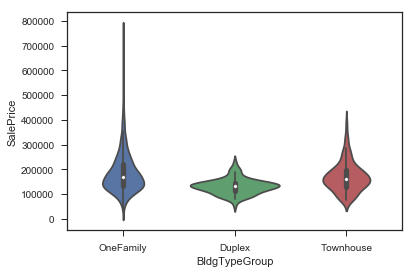

In [211]:
sns.violinplot(x="BldgTypeGroup", y="SalePrice", data=ames)

In [212]:
mod = ols('SalePrice ~ BldgTypeGroup',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
BldgTypeGroup,2.512745e+11,2.0,20.437747,1.762889e-09
Residual,8.956637e+12,1457.0,NaN,NaN


In [217]:
Dummy_BldgType = pd.get_dummies(ames['BldgTypeGroup'])
len(Dummy_BldgType)

1460

## HouseStyle
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

### Commnet:
Group into 2story v.s. 2story below  
pvalue=1.4301184309410576e-18

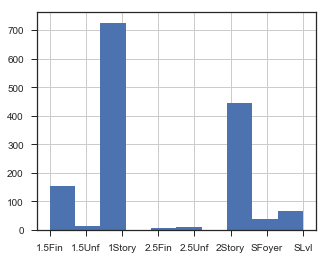

In [132]:
plt.figure(figsize=(5, 4))
ames.HouseStyle.hist()

In [196]:
# according to the table below, look like price start to change for 2Story and 2.5Fin
ames.groupby('HouseStyle')['SalePrice'].agg(['count', 'sum', 'min', 'max', 'mean', 'median','std']).sort_values(by='median')

,count,sum,min,max,mean,median,std
HouseStyle,,,,,,,
1.5Unf,14,1542100,76000,139400,110150.000000,111250,19036.473090
1.5Fin,154,22039978,37900,410000,143116.740260,132000,54277.941119
2.5Unf,11,1730900,101000,325000,157354.545455,133900,63934.128032
SFoyer,37,4997756,75500,206300,135074.486486,135960,30480.898192
1Story,726,127765457,34900,611657,175985.477961,154750,77055.715011
SLvl,65,10835720,91000,345000,166703.384615,164500,38305.161339
2Story,445,93473035,40000,755000,210051.764045,190000,87339.213570
2.5Fin,8,1760000,104000,475000,220000.000000,194000,118211.976671


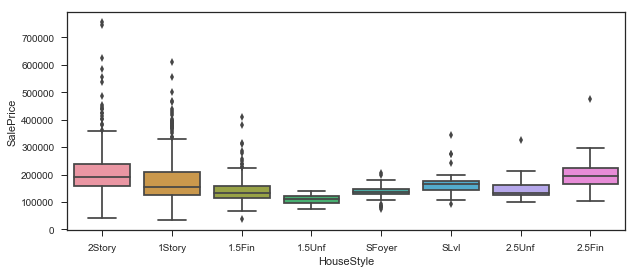

In [198]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="HouseStyle", y="SalePrice", data=ames)

In [127]:
mod = ols('SalePrice ~ HouseStyle',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
HouseStyle,7.947590e+11,7.0,19.595001,3.376777e-25
Residual,8.413152e+12,1452.0,NaN,NaN


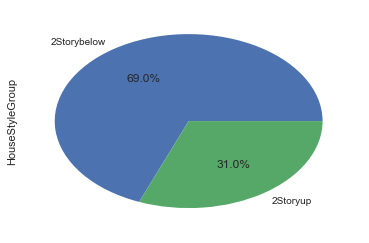

In [202]:
# group into 2Storyup vs 2Storybelow
ames['HouseStyleGroup'] = ['2Storyup' if x in ['2Story','2.5Fin'] else '2Storybelow' for x in ames.HouseStyle]
ames.HouseStyleGroup.value_counts().plot.pie(autopct='%1.1f%%')

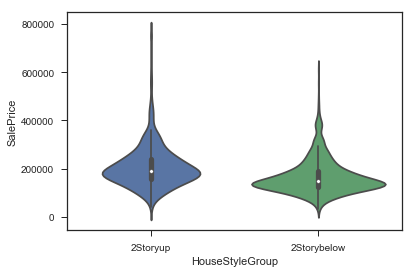

In [204]:
sns.violinplot(x="HouseStyleGroup", y="SalePrice", data=ames)

In [203]:
stats.ttest_ind(ames.SalePrice[ames.HouseStyleGroup == '2Storyup'], 
                ames.SalePrice[ames.HouseStyleGroup == '2Storybelow'], equal_var = False)

Ttest_indResult(statistic=9.035336889145194, pvalue=1.4301184309410576e-18)

In [208]:
Dummy_HouseStyle = pd.get_dummies(ames['HouseStyleGroup'])
len(Dummy_HouseStyle)

1460

## OverallQual
      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

### Commnet:
break down into <=4,5,6,7,>=8, 5 categories  
pvalue=3.462840e-297

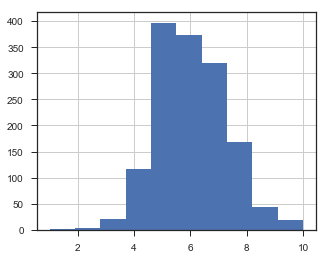

In [130]:
plt.figure(figsize=(5, 4))
ames.OverallQual.hist()

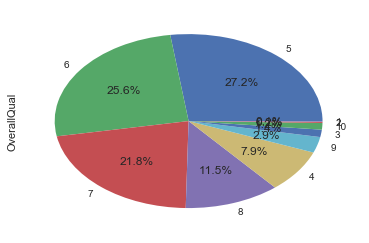

In [218]:
ames.OverallQual.value_counts().plot.pie(autopct='%1.1f%%')

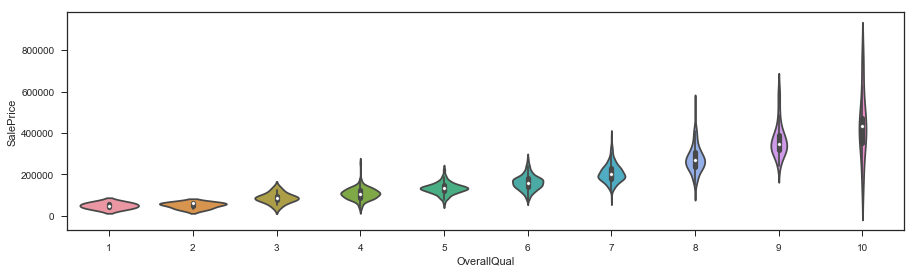

In [134]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="OverallQual", y="SalePrice", data=ames)

In [133]:
mod = ols('SalePrice ~ OverallQual',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
OverallQual,5.760947e+12,1.0,2436.770591,2.185675e-313
Residual,3.446964e+12,1458.0,NaN,NaN


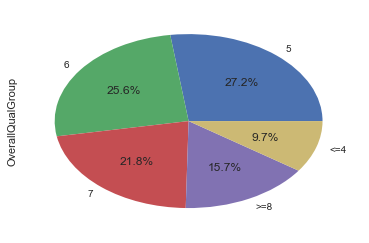

In [220]:
# break down into <4,5,6,7,>8 5 category
ames['OverallQualGroup'] = ['<=4' if x<=4 else x if x in [5,6,7] else '>=8' for x in ames.OverallQual]
ames.OverallQualGroup.value_counts().plot.pie(autopct='%1.1f%%')

In [221]:
mod = ols('SalePrice ~ OverallQualGroup',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
OverallQualGroup,5.635074e+12,4.0,573.706068,3.462840e-297
Residual,3.572837e+12,1455.0,NaN,NaN


In [222]:
Dummy_OverallQual = pd.get_dummies(ames['OverallQualGroup'])
len(Dummy_OverallQual)

1460

## OverallCond


### Comment:
break down into <=4,5,6,7,>=8, 5 categories  
pvalue=3.092954e-38

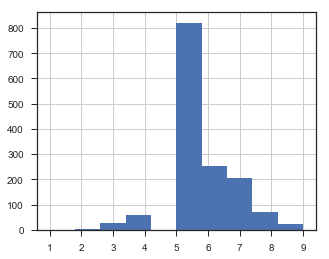

In [135]:
plt.figure(figsize=(5, 4))
ames.OverallCond.hist()

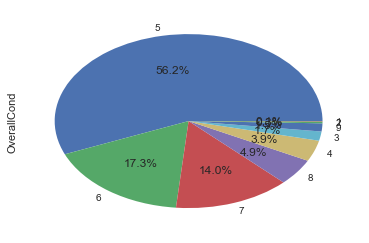

In [224]:
ames.OverallCond.value_counts().plot.pie(autopct='%1.1f%%')

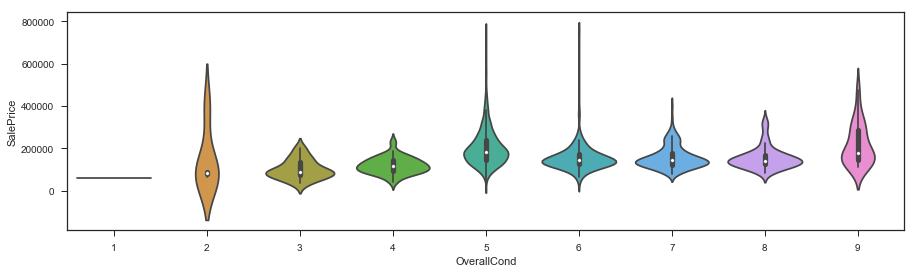

In [136]:
plt.figure(figsize=(15, 4))
sns.violinplot(x="OverallCond", y="SalePrice", data=ames)

In [137]:
mod = ols('SalePrice ~ OverallCond',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
OverallCond,5.581413e+10,1.0,8.891623,0.002912
Residual,9.152097e+12,1458.0,NaN,NaN


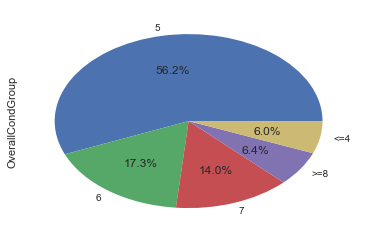

In [225]:
# break down into <4,5,6,7,>8 5 categories
ames['OverallCondGroup'] = ['<=4' if x<=4 else x if x in [5,6,7] else '>=8' for x in ames.OverallCond]
ames.OverallCondGroup.value_counts().plot.pie(autopct='%1.1f%%')

In [226]:
mod = ols('SalePrice ~ OverallCondGroup',data=ames).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
OverallCondGroup,1.080734e+12,4.0,48.370682,3.092954e-38
Residual,8.127177e+12,1455.0,NaN,NaN


In [227]:
Dummy_OverallCond = pd.get_dummies(ames['OverallCondGroup'])
len(Dummy_OverallCond)

1460

## YearBuilt/YearRemodAdd

### Comment:
house age = YrSold-YearRemodAdd (or YearBuilt?????)  
remod year seems more reasonable way to get house age.   
considering use this and drop yearbuild.  
need more evidence"


In [232]:
len(ames.YearRemodAdd)

1460

In [230]:
len(ames.YearBuilt)

1460

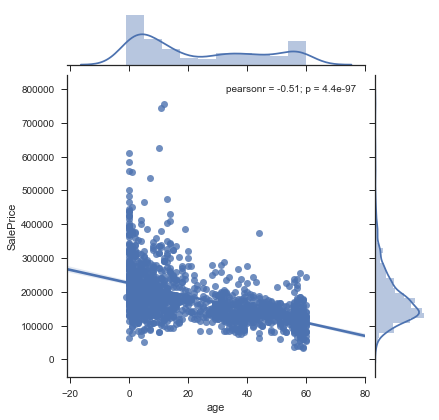

In [244]:
ames['age_b']=ames['YrSold']-ames['YearBuilt']
sns.jointplot(x='age', y='SalePrice', data=ames, kind="reg") 

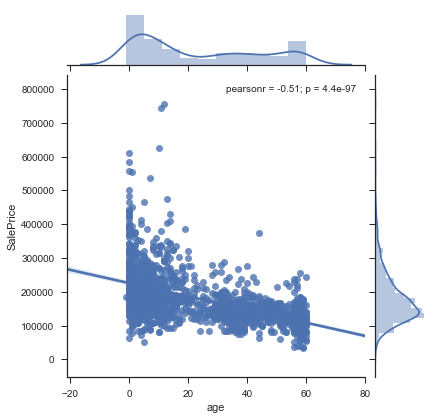

In [245]:
ames['age']=ames['YrSold']-ames['YearRemodAdd']
sns.jointplot(x='age', y='SalePrice', data=ames, kind="reg") 

In [241]:
print(stats.linregress(ames.LotArea, ames.SalePrice))
ols('SalePrice ~ age_b',data=ames).fit().params

LinregressResult(slope=2.0999719517076745, intercept=158836.1518968766, rvalue=0.2638433538714056, pvalue=1.1231391549186287e-24, stderr=0.2010575176984753)


Intercept    231153.244568
age_b         -1374.415125
dtype: float64

In [242]:
print(stats.linregress(ames.LotArea, ames.SalePrice))
ols('SalePrice ~ age',data=ames).fit().params

LinregressResult(slope=2.0999719517076745, intercept=158836.1518968766, rvalue=0.2638433538714056, pvalue=1.1231391549186287e-24, stderr=0.2010575176984753)


Intercept    225888.528773
age           -1959.360910
dtype: float64